In [15]:
from lxml import etree

# Parse KML file
tree = etree.parse('bengaluru_fire_stations.kml')
root = tree.getroot()
print(root)


<Element {http://www.opengis.net/kml/2.2}kml at 0x1ad52610c00>


In [ ]:
import folium
from lxml import etree

# Parse KML file
kml_file = 'bengaluru_fire_stations.kml'
tree = etree.parse(kml_file)
root = tree.getroot()

# Create a Folium map centered around Bengaluru
map_center = [12.971598, 77.594562]  # Bengaluru coordinates
my_map = folium.Map(location=map_center, zoom_start=12)

# Extract and add fire station locations to the map
for placemark in root.findall(".//{http://www.opengis.net/kml/2.2}Placemark"):
    coords_str = placemark.find(".//{http://www.opengis.net/kml/2.2}coordinates").text
    lon, lat = map(float, coords_str.split(','))

    # Check if FIRE_STAName element exists
    fire_station_name_elem = placemark.find('.//{http://www.opengis.net/kml/2.2}FIRE_STAName')
    if fire_station_name_elem is not None:
        fire_station_name = fire_station_name_elem.text
    else:
        fire_station_name = "Unknown Fire Station"

    # Add a marker for each fire station
    folium.Marker(
        location=[lat, lon],
        popup=f"Fire Station: {fire_station_name}"
    ).add_to(my_map)

# Save the map as an HTML file
my_map.save('fire_stations_map.html')


In [ ]:
import folium
from lxml import etree

# Read KML from the file as bytes
kml_file_path = "doctor.kml"
with open(kml_file_path, "rb") as kml_file:
    kml_code_bytes = kml_file.read()

# Parse KML using lxml etree
root = etree.fromstring(kml_code_bytes)

# Create a Folium map
mymap = folium.Map(location=[0, 0], zoom_start=10)

# Iterate through placemarks and add markers to the map
for placemark in root.xpath('//Placemark'):
    coordinates_str = placemark.findtext('.//Point/coordinates')
    if coordinates_str:
        coordinates = [float(coord) for coord in coordinates_str.split(',')[:2][::-1]]
        popup_text = f"""
        <b>Contact No:</b> {placemark.findtext('.//SimpleData[@name="Contact_No"]')}
        <br><b>NODAL OFFI:</b> {placemark.findtext('.//SimpleData[@name="NODAL_OFFI"]')}
        <br><b>Zone:</b> {placemark.findtext('.//SimpleData[@name="Zone"]')}
        <br><b>Ward:</b> {placemark.findtext('.//SimpleData[@name="ward"]')}
        <br><b>AC:</b> {placemark.findtext('.//SimpleData[@name="ac"]')}
        <br><b>LS:</b> {placemark.findtext('.//SimpleData[@name="ls"]')}
        """

        folium.Marker(location=coordinates, popup=folium.Popup(html=popup_text, max_width=300)).add_to(mymap)

# Save the map to an HTML file
output_html_path = "uphc_map.html"
mymap.save(output_html_path)
print(f"Map saved to {output_html_path}")


Map saved to uphc_map.html


In [ ]:
import folium
from lxml import etree

# Load KML file
kml_file_path = 'doctor.kml'
tree = etree.parse(kml_file_path)

# Create a Folium Map centered around Bangalore
bangalore_coords = [12.971598, 77.594562]  # Bangalore coordinates
map_bangalore = folium.Map(location=bangalore_coords, zoom_start=12)

# Iterate through Placemark elements in KML
placemarks = tree.xpath('//kml:Placemark', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
for placemark in placemarks:
    # Extract information from Placemark
    coordinates = placemark.findtext('.//kml:coordinates', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
    name = placemark.findtext('.//kml:SimpleData[@name="NODAL_OFFI"]', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})

    # Extract latitude and longitude
    longitude, latitude, _ = map(float, coordinates.split(','))

    # Create marker and popup for each doctor
    popup_content = f'<b>Doctor:</b> {name}<br><b>Coordinates:</b> {latitude}, {longitude}'
    folium.Marker(location=[latitude, longitude], popup=popup_content).add_to(map_bangalore)

# Save the map as an HTML file
html_file_path = 'doctors_map.html'
map_bangalore.save(html_file_path)

print(f"Map saved to {html_file_path}")


Map saved to doctors_map.html


In [25]:
import folium
from lxml import etree

# Load KML file
kml_file_path = "fire.kml"
with open(kml_file_path, 'rb') as file:
    kml_data = file.read()

# Define the namespace
ns = {"kml": "http://www.opengis.net/kml/2.2"}

# Parse KML data using lxml
root = etree.fromstring(kml_data)

# Find the first Placemark with Point and coordinates
placemarks_with_coordinates = root.xpath('//kml:Placemark[kml:Point/kml:coordinates]', namespaces=ns)
if placemarks_with_coordinates:
    placemark_with_point = placemarks_with_coordinates[0].xpath('.//kml:Point/kml:coordinates', namespaces=ns)[0].text
    coordinates = placemark_with_point.split(',')
    map_center = [float(coordinates[1]), float(coordinates[0])]

    # Create a folium map centered on the first placemark
    mymap = folium.Map(location=map_center, zoom_start=12)

    # Iterate through placemarks and add markers to the map
    for placemark in placemarks_with_coordinates:
        coordinates = placemark.xpath('.//kml:Point/kml:coordinates/text()', namespaces=ns)[0].split(',')
        lat, lon = float(coordinates[1]), float(coordinates[0])

        fire_station_name = placemark.xpath('.//kml:SimpleData[@name="FIRE_STAName"]/text()', namespaces=ns)[0]

        # Create a purple marker instead of the default blue marker
        marker = folium.Marker(
            location=[lat, lon],
            popup=f"{fire_station_name}<br>Coordinates: {lat}, {lon}",
            icon=folium.Icon(color='purple')
        )
        mymap.add_child(marker)

    # Save the map to an HTML file
    html_file_path = "output_map_with_coordinates.html"
    mymap.save(html_file_path)

    print(f"HTML file saved to: {html_file_path}")
else:
    print("No Placemark with Point and coordinates found in the KML file.")


HTML file saved to: output_map_with_coordinates.html


In [26]:
import folium
from lxml import etree

def create_marker(popup_content, latitude, longitude, marker_color):
    return folium.Marker(
        location=[latitude, longitude],
        popup=popup_content,
        icon=folium.Icon(color=marker_color)
    )

# Load doctor KML file
doctor_kml_file_path = 'doctor.kml'
tree_doctor = etree.parse(doctor_kml_file_path)

# Create a Folium Map centered around Bangalore
bangalore_coords = [12.971598, 77.594562]  # Bangalore coordinates
map_bangalore = folium.Map(location=bangalore_coords, zoom_start=12)

# Iterate through doctor Placemark elements in KML
placemarks_doctor = tree_doctor.xpath('//kml:Placemark', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
for placemark in placemarks_doctor:
    # Extract information from Placemark
    coordinates = placemark.findtext('.//kml:coordinates', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
    name = placemark.findtext('.//kml:SimpleData[@name="NODAL_OFFI"]', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})

    # Extract latitude and longitude
    longitude, latitude, _ = map(float, coordinates.split(','))

    # Create marker and popup for each doctor
    popup_content = f'<b>Doctor:</b> {name}<br><b>Coordinates:</b> {latitude}, {longitude}'
    marker = create_marker(popup_content, latitude, longitude, 'blue')
    map_bangalore.add_child(marker)

# Load fire station KML file
fire_kml_file_path = 'fire.kml'
with open(fire_kml_file_path, 'rb') as file:
    kml_data = file.read()

# Parse KML data using lxml
root_fire = etree.fromstring(kml_data)

# Find the fire station Placemarks with Point and coordinates
placemarks_with_coordinates_fire = root_fire.xpath('//kml:Placemark[kml:Point/kml:coordinates]', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
if placemarks_with_coordinates_fire:
    for placemark in placemarks_with_coordinates_fire:
        coordinates = placemark.xpath('.//kml:Point/kml:coordinates/text()', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})[0].split(',')
        lat, lon = float(coordinates[1]), float(coordinates[0])

        fire_station_name = placemark.xpath('.//kml:SimpleData[@name="FIRE_STAName"]/text()', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})[0]

        # Create a marker with purple color for fire station
        popup_content_fire = f"<b>Fire Station:</b> {fire_station_name}<br><b>Coordinates:</b> {lat}, {lon}"
        marker_fire = create_marker(popup_content_fire, lat, lon, 'purple')
        map_bangalore.add_child(marker_fire)

    # Save the map to an HTML file
    html_file_path_combined = 'combined_map.html'
    map_bangalore.save(html_file_path_combined)

    print(f"Combined HTML file saved to: {html_file_path_combined}")
else:
    print("No Placemark with Point and coordinates found in the Fire Station KML file.")


Combined HTML file saved to: combined_map.html


In [27]:
import folium
from lxml import etree

def create_marker(popup_content, latitude, longitude, marker_color):
    return folium.Marker(
        location=[latitude, longitude],
        popup=popup_content,
        icon=folium.Icon(color=marker_color)
    )

# Load doctor KML file
doctor_kml_file_path = 'doctor.kml'
tree_doctor = etree.parse(doctor_kml_file_path)

# Create a Folium Map centered around Bangalore
bangalore_coords = [12.971598, 77.594562]  # Bangalore coordinates
map_bangalore = folium.Map(location=bangalore_coords, zoom_start=12)

# Iterate through doctor Placemark elements in KML
placemarks_doctor = tree_doctor.xpath('//kml:Placemark', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
for placemark in placemarks_doctor:
    # Extract information from Placemark
    coordinates = placemark.findtext('.//kml:coordinates', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
    name = placemark.findtext('.//kml:SimpleData[@name="NODAL_OFFI"]', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
    contact_number = placemark.findtext('.//kml:SimpleData[@name="Contact_No"]', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})

    # Extract latitude and longitude
    longitude, latitude, _ = map(float, coordinates.split(','))

    # Create marker and popup for each doctor
    popup_content = f'<b>Doctor:</b> {name}<br><b>Contact Number:</b> {contact_number}<br><b>Coordinates:</b> {latitude}, {longitude}'
    marker = create_marker(popup_content, latitude, longitude, 'blue')
    map_bangalore.add_child(marker)

# Load fire station KML file
fire_kml_file_path = 'fire.kml'
with open(fire_kml_file_path, 'rb') as file:
    kml_data = file.read()

# Parse KML data using lxml
root_fire = etree.fromstring(kml_data)

# Find the fire station Placemarks with Point and coordinates
placemarks_with_coordinates_fire = root_fire.xpath('//kml:Placemark[kml:Point/kml:coordinates]', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})
if placemarks_with_coordinates_fire:
    for placemark in placemarks_with_coordinates_fire:
        coordinates = placemark.xpath('.//kml:Point/kml:coordinates/text()', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})[0].split(',')
        lat, lon = float(coordinates[1]), float(coordinates[0])

        fire_station_name = placemark.xpath('.//kml:SimpleData[@name="FIRE_STAName"]/text()', namespaces={'kml': 'http://www.opengis.net/kml/2.2'})[0]

        # Create a marker with purple color for fire station
        popup_content_fire = f"<b>Fire Station:</b> {fire_station_name}<br><b>Coordinates:</b> {lat}, {lon}"
        marker_fire = create_marker(popup_content_fire, lat, lon, 'purple')
        map_bangalore.add_child(marker_fire)

    # Save the map to an HTML file
    html_file_path_combined = 'combined_map.html'
    map_bangalore.save(html_file_path_combined)

    print(f"Combined HTML file saved to: {html_file_path_combined}")
else:
    print("No Placemark with Point and coordinates found in the Fire Station KML file.")


Combined HTML file saved to: combined_map.html


In [33]:
from bs4 import BeautifulSoup
import csv

# Read the content of the KML file
with open("fire.kml", "r", encoding="utf-8") as kml_file:
    kml_content = kml_file.read()

# Parse the KML content using BeautifulSoup
soup = BeautifulSoup(kml_content, "xml")

# Open a CSV file for writing
with open("fire_stations.csv", mode="w", newline="", encoding="utf-8") as csv_file:
    # Create a CSV writer object
    csv_writer = csv.writer(csv_file)

    # Write the header row
    csv_writer.writerow(["Fire station", "Coordinates"])

    # Find all Placemark elements
    placemarks = soup.find_all("Placemark")

    # Iterate over each Placemark
    for placemark in placemarks:
        # Extract information from SimpleData and Point elements
        fire_station_name = placemark.find("SimpleData", {"name": "FIRE_STAName"}).text
        coordinates = placemark.find("coordinates").text

        # Write the information to the CSV file
        csv_writer.writerow([fire_station_name, coordinates])

print("CSV file created successfully.")


CSV file created successfully.


In [1]:
import csv
import json

def csv_to_json(csv_file, json_file):
    # Open the CSV file for reading
    with open(csv_file, 'r') as csv_file:
        # Read the CSV file into a Python dictionary
        csv_data = csv.DictReader(csv_file)

        # Convert the CSV data to a list of dictionaries
        data_list = list(csv_data)

    # Write the list of dictionaries to a JSON file
    with open(json_file, 'w') as json_file:
        json.dump(data_list, json_file, indent=4)

# Replace 'input.csv' and 'output.json' with your actual file names
csv_to_json('doctors_data.csv', 'doctors.json')


In [2]:
from bs4 import BeautifulSoup
import csv

# Load the KML file
with open('doctor.kml', 'r', encoding='utf-8') as kml_file:
    kml_data = kml_file.read()

# Parse the KML file using BeautifulSoup
soup = BeautifulSoup(kml_data, 'xml')

# Open CSV file for writing
with open('doctors_data1.csv', 'w', newline='') as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write header row
    csv_writer.writerow(['Contact_No', 'Doctor', 'Coordinates'])

    # Find all Placemark elements
    placemarks = soup.find_all('Placemark')

    # Iterate over each Placemark
    for placemark in placemarks:
        # Extract data from SimpleData and Point elements
        contact_no = placemark.find('SimpleData', {'name': 'Contact_No'}).text.strip()
        doctor = placemark.find('SimpleData', {'name': 'NODAL_OFFI'}).text.strip()
        coordinates = placemark.find('Point').find('coordinates').text.strip()

        # Split coordinates into latitude, longitude, and altitude
        coordinates_list = [float(coord) for coord in coordinates.split(',')]

        # Write data to CSV
        csv_writer.writerow([contact_no, doctor, coordinates_list])

print("CSV File")


CSV File


In [6]:
import webbrowser

def generate_bing_maps_url(start_coords, end_coords):
    url = f"https://www.bing.com/maps?rtp=pos.{start_coords[0]}_{start_coords[1]}~pos.{end_coords[0]}_{end_coords[1]}&mode=D"
    return url

# Example locations (latitude and longitude)
start_location = (12.9367019, 77.5093834)
end_location = (12.9210167, 77.4931278)

# Generate Bing Maps URL
bing_maps_url = generate_bing_maps_url(start_location, end_location)
print(bing_maps_url)


https://www.bing.com/maps?rtp=pos.12.9367019_77.5093834~pos.12.9210167_77.4931278&mode=D


In [4]:
import cv2
import numpy as np
from IPython.display import display, HTML
from IPython.display import Video

def dark_channel(image, window_size=15):
    min_channel = np.min(image, axis=2)
    return cv2.erode(min_channel, np.ones((window_size, window_size)))

def estimate_atmosphere(image, dark_channel, percentile=0.001):
    flat_dark_channel = dark_channel.flatten()
    flat_image = image.reshape(-1, 3)
    num_pixels = flat_image.shape[0]
    num_pixels_to_keep = int(num_pixels * percentile)
    indices = np.argpartition(flat_dark_channel, -num_pixels_to_keep)[-num_pixels_to_keep:]
    atmosphere = np.max(flat_image[indices], axis=0)
    return atmosphere

def dehaze(image, tmin=0.1, omega=0.95, window_size=15):
    if image is None:
        return None

    image = image.astype(np.float64) / 255.0
    dark_ch = dark_channel(image, window_size)
    atmosphere = estimate_atmosphere(image, dark_ch)
    transmission = 1 - omega * dark_ch

    transmission = np.maximum(transmission, tmin)
    dehazed = np.zeros_like(image)
    for channel in range(3):
        dehazed[:, :, channel] = (image[:, :, channel] - atmosphere[channel]) / transmission + atmosphere[channel]

    dehazed = np.clip(dehazed, 0, 1)

    return (dehazed * 255).astype(np.uint8)

# Path to the video file
video_path = "original.mp4"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps

# Set the desired number of frames
target_frames = int(duration)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = "output777.mp4"
frame_width = 2720
frame_height = 1530
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Loop through each frame, apply desmoking, and write to the output video
frame_count = 0
while frame_count < target_frames:
    success, frame = cap.read()
    if not success:
        break

    # Apply desmoking to the frame
    dehazed_frame = dehaze(frame)

    # Write the dehazed frame to the output video
    output_video.write(dehazed_frame)

    frame_count += 1

# Release the video capture and video writer objects
cap.release()
output_video.release()
# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'h264')  # or 'mp4v'
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))


# Display the dehazed video directly in the notebook
video_path_display = "output777.mp4"
video_html = """
<video width="720" height="530" controls>
  <source src="{}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""".format(video_path_display)

display(HTML(video_html))


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage, TextArea
import os

class Maze:
    def __init__(self, maze, start_position, goal_positions):
        self.maze = maze
        self.maze_height = maze.shape[0]
        self.maze_width = maze.shape[1]
        self.start_position = start_position
        self.goal_positions = goal_positions
        self.text_annotations = []




    def show_maze(self, show_annotations=True, save_path=None):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.maze, cmap='gray')

        plt.text(self.start_position[0], self.start_position[1], 'Man', ha='center', va='center', color='red', fontsize=20)
        for goal_position in self.goal_positions:
            plt.text(goal_position[0], goal_position[1], 'Exit', ha='center', va='center', color='green', fontsize=20)

        if show_annotations:
            # Add text annotations directly
            plt.text(0.5, 1, "Room 1", ha='center', va='center', color='black', fontsize=14)
            plt.text(5, 2, "Dining", ha='center', va='center', color='black', fontsize=14)
            plt.text(0.5, 4.5, "Bath", ha='center', va='center', color='black', fontsize=14)
            plt.text(0.5, 6, "Drawing", ha='center', va='center', color='black', fontsize=14)
            plt.text(5.5, 6, "Bath", ha='center', va='center', color='black', fontsize=14)
            plt.text(0.5, 7, "Varanda", ha='center', va='center', color='black', fontsize=14)

            for annotation in self.text_annotations:
                plt.gca().add_artist(annotation)

        plt.xticks([]), plt.yticks([])

        if save_path:
            plt.savefig(save_path, bbox_inches='tight')

        plt.show()




    def update_cell(self, x, y, value):
        if 0 <= x < self.maze_width and 0 <= y < self.maze_height:
            self.maze[y][x] = value
            print(f"Updated maze at ({x}, {y}) to {value}")
        else:
            print(f"Invalid coordinates: ({x}, {y})")



    def clear_text_annotations(self):
        self.text_annotations = []

# Continue with the rest of your code...
     

This code block has been run and the Maze class is now available for use.
Updated maze at (2, 6) to 1


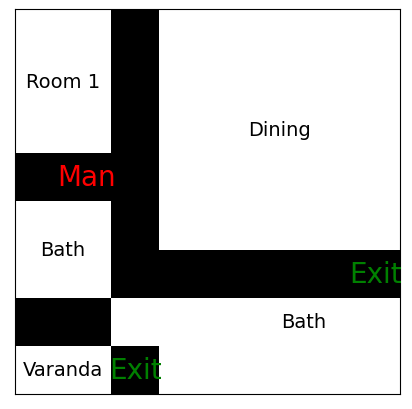

In [41]:
print("This code block has been run and the Maze class is now available for use.")
maze_layout = np.array([
    [1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 1],
])

start_position = (1, 3)
goal_positions = [(7, 5), (2, 7)]  # Example with two exit points

# Create an instance of the maze
maze = Maze(maze_layout, start_position, goal_positions)

# Update a cell in the maze
maze.update_cell(2, 6, 1)

# Show the maze with added text


# Example usage of placing text in the maze
# Example usage of placing text in the maze
maze.show_maze(save_path=r'static/block.png')


#
actions = [(-1, 0),  
           (1, 0),   
           (0, -1), 
           (0, 1)]   







In [42]:
class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01,
                 num_episodes=100):
        # Initialize the Q-learning agent with a Q-table containing all zeros
        # where the rows represent states, columns represent actions, and the third dimension is for each action (Up, Down, Left, Right)
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))  # 4 actions: Up, Down, Left, Right
        self.learning_rate = learning_rate  # Learning rate controls how much the agent updates its Q-values after each action
        self.discount_factor = discount_factor  # Discount factor determines the importance of future rewards in the agent's decisions
        self.exploration_start = exploration_start  # Exploration rate determines the likelihood of the agent taking a random action
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculate the current exploration rate using the given formula
        exploration_rate = self.exploration_start * (
                self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)  # Choose a random action (index 0 to 3, representing Up, Down, Left, Right)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):
        # Find the best next action by selecting the action that maximizes the Q-value for the next state
        best_next_action = np.argmax(self.q_table[next_state])

        # Get the current Q-value for the current state and action
        current_q_value = self.q_table[state][action]

        # Q-value update using Q-learning formula
        new_q_value = current_q_value + self.learning_rate * (
                reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Update the Q-table with the new Q-value for the current state and action
        self.q_table[state][action] = new_q_value


print("This code block has been run, and the QLearningAgent class is now available for use.")

goal_reward = 100
wall_penalty = -10
step_penalty = -1

print("The reward system has been defined.")

# This function simulates the agent's movements in the maze for a single episode.


This code block has been run, and the QLearningAgent class is now available for use.
The reward system has been defined.


In [43]:
def finish_episode(agent, maze, current_episode, train=True):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continue until the episode is done
    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or \
                maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Check if the agent reached any of the goals
        elif next_state in maze.goal_positions:
            path.append(next_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(next_state)
            reward = step_penalty

        # Update the cumulative reward and step count for the episode
        episode_reward += reward
        episode_step += 1

        # Update the agent's Q-table if training is enabled
        if train:
            agent.update_q_table(current_state, action, next_state, reward)

        # Move to the next state for the next iteration
        current_state = next_state

    # Return the cumulative episode reward, total number of steps, and the agent's path during the simulation
    return episode_reward, episode_step, path


Learned Path:
(1, 3) -> (2, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (2, 3) -> (2, 4) -> (2, 5) -> (3, 5) -> (4, 5) -> (5, 5) -> (4, 5) -> (3, 5) -> (4, 5) -> (5, 5) -> (6, 5) -> (5, 5) -> (6, 5) -> (5, 5) -> (4, 5) -> (5, 5) -> (4, 5) -> (5, 5) -> (4, 5) -> (5, 5) -> (4, 5) -> (3, 5) -> (4, 5) -> (3, 5) -> (2, 5) -> (2, 4) -> (2, 3) -> (1, 3) -> (2, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (2, 3) -> (2, 4) -> (2, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (2, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (2, 3) -> (2, 4) -> (2, 5) -> (2, 4) -> (2, 5) -> (2, 4) -> (2, 5) -> (2, 4) -> (2, 3) -> (2, 2) -> (2, 3) -> (2, 2) -> (2, 3) -> (2, 2) -> (2, 1) -> (2, 0) -> (2, 1) -> (2, 2) -> (2, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (2, 3) -> (2, 4) -> (2, 5) -> (3, 5) -> (4, 5) -> (3, 5) -> (2, 5) -> (2, 4) -> (2, 5) -> (2, 4) -> (2, 5) -> (2, 4) -> (2, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (0, 3) -> (1, 3) -> (2, 3) -> (1, 3)

<Figure size 640x480 with 0 Axes>

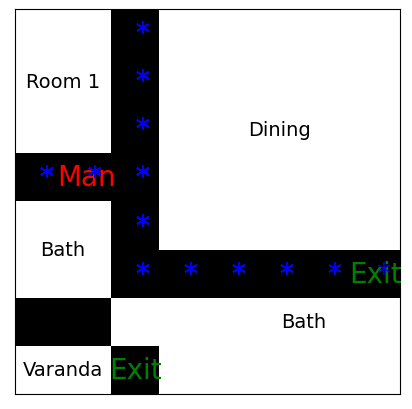

This code block has been run, and the train_agent function is now available for use.
The average reward is: 27.36
The average steps are: 20.27


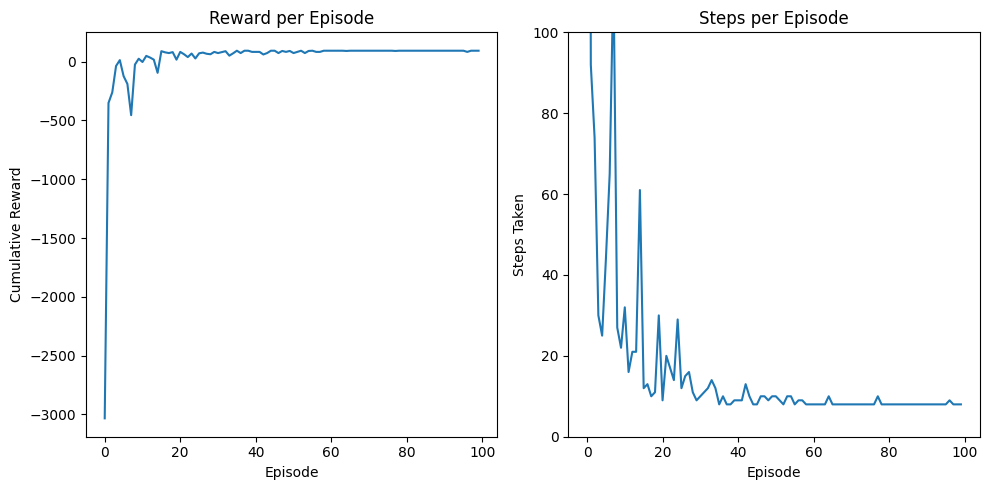

Learned Path:
(1, 3) -> (2, 3) -> (2, 4) -> (2, 5) -> (3, 5) -> (4, 5) -> (5, 5) -> (6, 5) -> (7, 5) -> Goal!
Number of steps: 8
Total reward: 93


<Figure size 640x480 with 0 Axes>

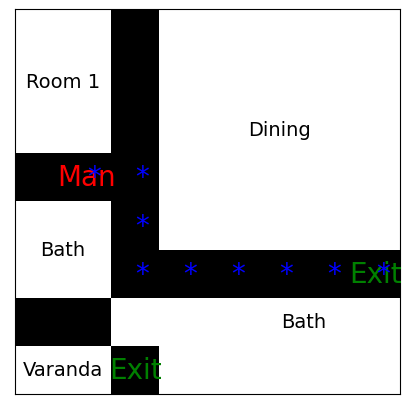

(8, 93)

In [44]:
def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for position in path:
        print(f"({position[0]}, {position[1]}) -> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal positions (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'Man', ha='center', va='center', color='red', fontsize=20)
    for goal_position in maze.goal_positions:
        plt.text(goal_position[0], goal_position[1], 'Exit', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue 'X' symbols
    for position in path:
        plt.text(position[0], position[1], "*", va='center', color='blue', fontsize=20)

    # Add text annotations
    plt.text(0.5, 1, "Room 1", ha='center', va='center', color='black', fontsize=14)
    plt.text(5, 2, "Dining", ha='center', va='center', color='black', fontsize=14)
    plt.text(0.5, 4.5, "Bath", ha='center', va='center', color='black', fontsize=14)
    plt.text(0.5, 6, "Drawing", ha='center', va='center', color='black', fontsize=14)
    plt.text(5.5, 6, "Bath", ha='center', va='center', color='black', fontsize=14)
    plt.text(0.5, 7, "Varanda", ha='center', va='center', color='black', fontsize=14)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)

    # Save the figure as an image file
    plt.savefig('escape_route.png')

    # Display the plot
    plt.show()

    return episode_step, episode_reward



agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps are: {average_steps}")

    plt.tight_layout()
    plt.show()


print("This code block has been run, and the train_agent function is now available for use.")

# Training the agent
train_agent(agent, maze, num_episodes=100)

# Testing the agent after training
test_agent(agent, maze, num_episodes=100)
